<a href="https://colab.research.google.com/github/ajayaram92/Satalite-Prediction/blob/main/Satalite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import requests
import pandas as pd
import numpy as np
import tensorflow as tf
from scipy import stats

In [ ]:
url = "https://raw.githubusercontent.com/ajayaram92/Satalite-Prediction/main/Database.csv"
df = pd.read_csv(url)
df = df.drop(["objID"], axis = 1)

In [ ]:
def cleaning(df, column):
  column_names = df.columns
   
  new_columns= (list(column_names[0:15])) 
  new_columns.append(column)
  #new_columns.append(str(column + " Category"))
  new_pd = df[new_columns].dropna().reset_index()
  new_pd = new_pd.drop(["index"], axis = 1)
  return((new_pd))

data = cleaning(df, "pH")
print(data)

      Longitude   Latitude      B1   B10  ...      B8     B8A     B9    pH
0     77.812500  18.751111  1482.0  21.0  ...  1464.5  1705.5  393.5  7.25
1     77.433900  18.351600  1409.5  15.5  ...  1338.5  1495.0  352.0  7.18
2     77.433900  18.350800  1415.0  16.0  ...  1334.5  1579.5  365.0  7.63
3     77.558857  18.314899  1377.0  25.5  ...  1090.0  1247.0  323.5  7.48
4     78.018333  19.870278  1424.0  11.0  ...  2106.0  2388.5  542.5  8.41
...         ...        ...     ...   ...  ...     ...     ...    ...   ...
9801  77.451160  19.241660  1408.0  11.5  ...  1747.5  2035.0  440.5  8.72
9802  77.422618  18.327200  1378.5  16.0  ...  1372.0  1554.0  358.0  7.52
9803  77.823333  18.843889  1449.5  21.0  ...  1458.0  1667.5  375.5  7.00
9804  77.517882  18.467689  1442.5  14.5  ...  1731.0  2014.0  445.0  7.43
9805  77.524953  18.538106  1425.5  17.5  ...  1436.0  1692.0  354.0  7.42

[9806 rows x 16 columns]


In [ ]:
def normalize(x, mean, std):
  return ((x-mean)/std)

In [ ]:
def splitting(data,training_split=0.8):
  data = data.drop(["Longitude", "Latitude"], axis=1)
  data = data.to_numpy()
  np.random.shuffle(data)
  train_set= data[0:int(len(data)*training_split)]
  test_set = data[int(len(data)*training_split):]
  mean = train_set.mean(axis = 0)
  std = train_set.std(axis = 0)
  
  train_set = normalize(train_set, mean, std)
  test_set = normalize(test_set, mean, std)
  
  def output(array):
    output_array = array[:,-1]
    array = np.delete(array, -1, axis=1)
    return(array, output_array)

  train_set, train_output = output(train_set)
  test_set, test_output = output(test_set)

  return(train_set, train_output, test_set, test_output, mean, std)
  

train_set, train_output, test_set, test_output, mean, std = splitting(data)
  


In [ ]:

#print(train_set)
print(train_output.shape)
print(train_set.shape)

(7844,)
(7844, 13)


In [ ]:

Layer = tf.keras.layers
model = tf.keras.models.Sequential([Layer.Dense(13, input_shape=(13,)),
                                    Layer.Dense(1)])
optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss, )


In [ ]:
tf.keras.backend.clear_session()
history = model.fit(train_set, train_output, epochs=500, validation_data=(test_set, test_output))

Epoch 1/500
246/246 [==============================] - 1s 2ms/step - loss: 1.4356 - val_loss: 6.1412
Epoch 2/500
246/246 [==============================] - 0s 1ms/step - loss: 1.0167 - val_loss: 6.1374
Epoch 3/500
246/246 [==============================] - 0s 1ms/step - loss: 3.0436 - val_loss: 6.1336
Epoch 4/500
246/246 [==============================] - 0s 1ms/step - loss: 1.5617 - val_loss: 6.1300
Epoch 5/500
246/246 [==============================] - 0s 1ms/step - loss: 0.8822 - val_loss: 6.1265
Epoch 6/500
246/246 [==============================] - 0s 1ms/step - loss: 1.9024 - val_loss: 6.1230
Epoch 7/500
246/246 [==============================] - 0s 1ms/step - loss: 1.3224 - val_loss: 6.1197
Epoch 8/500
246/246 [==============================] - 0s 1ms/step - loss: 2.7307 - val_loss: 6.1163
Epoch 9/500
246/246 [==============================] - 0s 1ms/step - loss: 1.7513 - val_loss: 6.1131
Epoch 10/500
246/246 [==============================] - 0s 1ms/step - loss: 1.2646 - val_lo

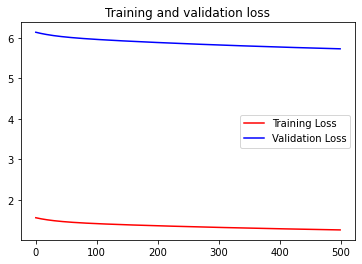

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))


plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()